In [4]:
import numpy as np
import autograd
import matplotlib.pyplot as plt 

# 1. Contour simple

## Amorce

In [5]:
def find_seed(g, x=0, c =0, eps = 2**(-26)):
    """
    trouve la valeur t telle que g(t) = c à epsilon près
    """
    
    gauche = 0
    droite = 1
    
    if (g(x,0)-c)*(g(x,1)-c) > 0 :
        return None
        
    while ((droite-gauche)/2) >= eps :
        milieu = (droite + gauche)/2
        
        if (g(x,droite)-c)*(g(x,milieu)-c)<=0 :
            gauche = milieu
        
        else :
            droite = milieu
    
    return (droite+gauche)/2

## Propagation

In [19]:
def simple_contour1(f, c, delta=0.01) :
    """
    renvoie un fragment de ligne de niveau de valeur c de f
    sou la forme de deux tableaux 
    """
    X = []
    Y=[]
    xo = 0
    yo = 0
    while xo <=1 :
        yo = find_seed(f, xo, c)
        if yo != None :
            X.append(xo)
            Y.append(yo)
        xo = xo + delta
    return X, Y           

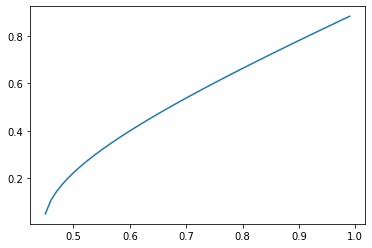

In [20]:
## Test de notre permière fonction 
def f (x, y) :
    return x**2-y**2

X, Y = simple_contour1(f, 0.2 ) 
plt.plot(X,Y)
plt.show()

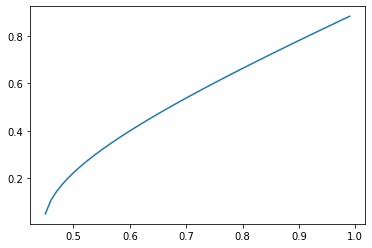

In [18]:
def grad_f(x,y) :
    g = autograd.grad
    return np.r_[g(f,0)(x, y), g(f, 1)(x,y)]

def norme_un (vecteur) :
    """
    prend en entrée un vecteur de R² et le rend unitaire
    """
    return vecteur/ sqrt(vecteur[0]**2 + vecteur[1]**2)

def simple_contour(f, c, delta = 0.01) :
    """
    renvoie un fragment de ligne de niveau de valeur c de f
    sous la forme de deux tableaux 
    """ 
    xo = 0
    yo = find_seed (f, c)
    if yo == None :
        return [], []
    else :
        signe = grad_f(xo, yo)[1]/abs(grad_f(xo, yo)[1])
        x = np.array([xo])
        y = np.array([yo])
        vecteur_directeur = norme_un([signe*grad_f(xo, yo)[1], -1*signe*grad_f(xo, yo)[0]])
        xo = xo + vecteur_directeur[0]*delta
        yo = yo + vecteur_directeur[1]*delta
    while xo <= 1 and yo <= 1 :
        x.append(xo)
        y.append(yo)
        vecteur_directeur = norme_un([signe*grad_f(xo, yo)[1], -1*signe*grad_f(xo, yo)[0]])
        xo = xo + vecteur_directeur[0]*delta
        yo = yo + vecteur_directeur[1]*delta
    return x, y 


In [ ]:
## Test de la deuxième fonction

In [2]:
import numpy as np
import ma


def arc_cercle(vecteur, angle = np.pi/4) :
    vecteur1 = np.dot(np.array[[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]], vecteur)
    vecteur2 = np.dot(np.array[[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]], vecteur)
    return - min(vecteur1[0], vecteur2[0]) + max(vecteur1[0], vecteur2[0])

def max(x, y) :
    if x >= y :
        return x
    else :
        return y

def min(x, y) :
    if x <= y :
        return x
    else :
        return y

def simple_contourV2(f, c, delta = 0.01, epsilon = 10**-12) :
    """
    renvoie un fragment de ligne de niveau de valeur c de f
    sous la forme de deux tableaux, sur la même méthode mais en affinant en générant un point aléatoire sur un arc de cercle
    de centre le point précédent, de rayon delta et centré sur le point trouvé par la méthode classique 
    """
    x = np.array()
    y = np.array() 
    xo = 0
    yo = find_seed (f, c)
    k = 0 # va compter le nombre de points trouvés sur l ligne de champ
    if yo == None :
        return x, y
    else :
        signe = grad_f(xo, yo)[1]/abs(grad_f(xo, yo)[1])
        x.append(xo)
        y.append(yo)
        k+=1
        vecteur_directeur = norme_un([signe*grad_f(xo, yo)[1], -1*signe*grad_f(xo, yo)[0]])
        xo = xo + vecteur_directeur[0]*delta
        yo = yo + vecteur_directeur[1]*delta        
    while xo <= 1 and yo <= 1 :
        if abs(f(xo, yo) -c) > epsilon : 
            ## si le point n'est pas satistaisant, 
            ## on en cherche un dans son voisinage, à une distance delta du précédent, aléatoirement
            n = 0 
            while n < 5000 and abs(f(nouvx, nouvy)-c) > epsilon : 
                ## on veille à avoir un programme qui se termine toujours, même dans un cas dégénéré
                n+=1
                nouvx = x[k] + np.random()*arc_cercle(np.array[xo, yo])
                nouvy = sqrt(abs(nouvx**2 - delta**2))
                if abs(f(nouvx, nouvy)-c) <= abs(f(xo, yo )-c) :
                    xo = nouvx
                    yo = nouvy 
        x.append(xo)
        y.append(yo)
        k+=1
        vecteur_directeur = norme_un([signe*grad_f(xo, yo)[1], -1*signe*grad_f(xo, yo)[0]])
        xo = xo + vecteur_directeur[0]*delta
        yo = yo + vecteur_directeur[1]*delta
    return x, y 
                

In [ ]:
## test de la fonction

In [2]:
def g(f,x,y,c): #on implémente g pour pouvoir utiliser le théorème des focntions implicites dans le cas où c ne vaut pas 0
    return  f(x,y)-c



def simple_contourV3(f,c,delta=0.01):  
    X=[]
    Y=[]
    x0=0
    y0=0
    while x0<=1 and y0<=1:
        y0=find_seed(g,x0,c)
        x0=x0+delta
        y0=y0+(-grad_g[0]/grad_g[1])*x0
        X.append(x0)
        Y.append(y0)
    return X, Y


In [3]:
def f (x, y) :
    return x**2-y**2

X, Y = simple_contourV3(f, 0.2 ) 
plt.plot(X,Y)
plt.show()

NameError: name 'simple_contour' is not defined

# 2. Contour complexe 

In [ ]:
#version m
def contour(f,c=0.0, xc=[0.0,1.0], yc=[0.0,1.0], delta=0.01):
    xs=[]
    ys=[]
    for i in range(len(xc)):#pour chaque cellule
     
    
    
        